In [4]:
import numpy as np

Testing code using randomly generated matrices

In [5]:
import PCA_implementations as algorithms
import PCA_metrics as metrics
from PCA_implementations import reconstruct_PCA, k_dim_PCA, microsoft_alg_1, laplace_input_perturbation, wishart_input_perturbation

A = np.random.rand(20, 30)

In [13]:
k = 20
PCA_A = algorithms.k_dim_PCA(np.matmul(np.transpose(A), A), 10)

#TODO: create a random matrix that's sparse


In [7]:
insurance = np.loadtxt("data/ticdata2000.txt") #https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/
o_ring = np.loadtxt("data/o-ring-erosion-only.data") #https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring
vowels = np.loadtxt("data/ae.test")# https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels

In [8]:
epsilon_range = [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
delta_range = [0.001, 0.01, 0.1, 0.5, 1]

In [9]:
#data_vars = {"random":A, "o-ring":o_ring}#, "ae":vowels, "insurance":insurance}


random_results = {}
o_ring_results = {}
vowels_results = {}
insurance_results = {}

PCA_random = reconstruct_PCA(A, k_dim_PCA(A, k))
PCA_oring = reconstruct_PCA(o_ring, k_dim_PCA(o_ring, k))


for epsilon in epsilon_range:
    random_results[epsilon] = {}
    o_ring_results[epsilon] = {}
    for delta in delta_range:
        random_results[epsilon][delta] = {}
        o_ring_results[epsilon][delta] = {}
        
        microsoft_PCA = reconstruct_PCA(A, microsoft_alg_1(A,epsilon, delta, k))
        wishart_PCA = reconstruct_PCA(A, wishart_input_perturbation(A, epsilon, k))
        laplace_PCA = reconstruct_PCA(A, laplace_input_perturbation(A, epsilon, k))
        random_results[epsilon][delta]["microsoft"] = metrics.subspace_dist(PCA_random, microsoft_PCA)
        random_results[epsilon][delta]["wishart"] = metrics.subspace_dist(PCA_random, wishart_PCA)
        random_results[epsilon][delta]["laplace"] = metrics.subspace_dist(PCA_random, laplace_PCA)
        
        
        microsoft_PCA = reconstruct_PCA(o_ring, microsoft_alg_1(o_ring,epsilon, delta, k))
        wishart_PCA = reconstruct_PCA(o_ring, wishart_input_perturbation(o_ring, epsilon, k))
        laplace_PCA = reconstruct_PCA(o_ring, laplace_input_perturbation(o_ring, epsilon, k))
        o_ring_results[epsilon][delta]["microsoft"] = metrics.subspace_dist(PCA_oring, microsoft_PCA)
        o_ring_results[epsilon][delta]["wishart"] = metrics.subspace_dist(PCA_oring, wishart_PCA)
        o_ring_results[epsilon][delta]["laplace"] = metrics.subspace_dist(PCA_oring, laplace_PCA)
        
        

ORING PLOTS


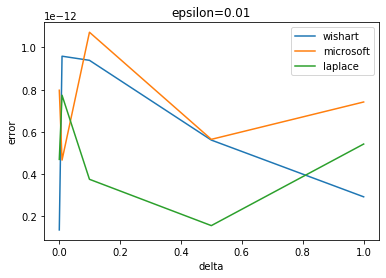

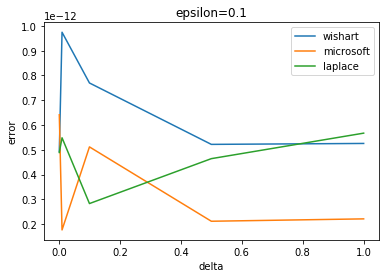

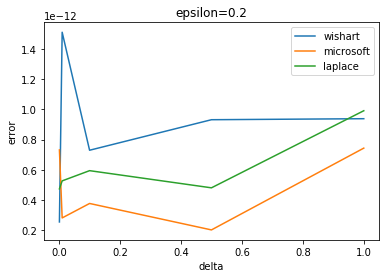

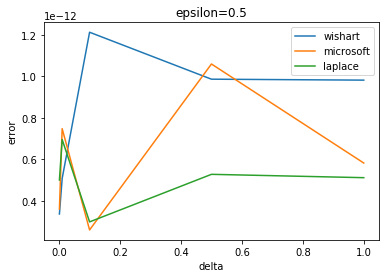

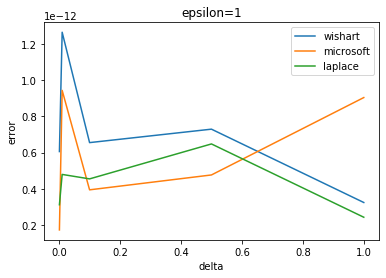

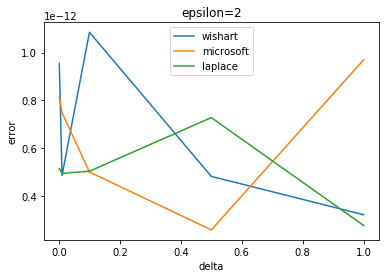

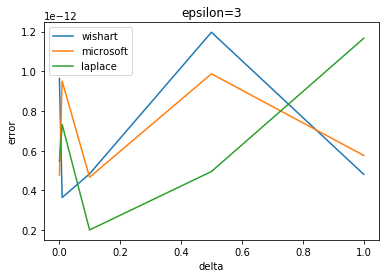

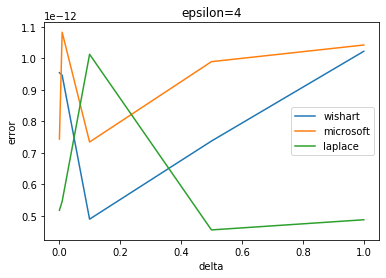

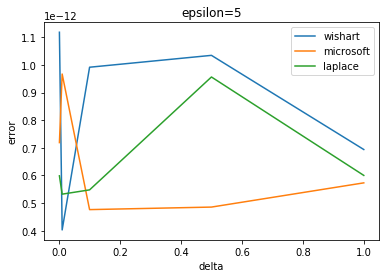

In [12]:
import matplotlib.pyplot as plt

print ("ORING PLOTS")
for epsilon in epsilon_range:
    plt.plot(delta_range,[o_ring_results[epsilon][delta]['wishart'] for delta in delta_range], label="wishart")
    plt.plot(delta_range,[o_ring_results[epsilon][delta]['microsoft'] for delta in delta_range], label="microsoft")
    plt.plot(delta_range,[o_ring_results[epsilon][delta]['laplace'] for delta in delta_range], label="laplace")
    plt.title('epsilon={}'.format(epsilon))
    plt.xlabel('delta')
    plt.ylabel('error')
    plt.legend()
    plt.show()
#print(o_ring_results)

In [3]:
import cv2
import sklearn

In [28]:
im = cv2.imread("data/monarch.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2.imwrite("output/monarch_original.jpg", im)

True

In [29]:
Xhat = algorithms.reconstruct_PCA(im, algorithms.k_dim_PCA(im, 100))
Xhat = cv2.normalize(Xhat, Xhat, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_PCA_100.jpg", Xhat)

True

In [30]:
Xhat_approx = algorithms.reconstruct_PCA(im, algorithms.microsoft_alg_1(im, 1, 0.2, 100))
Xhat_approx = cv2.normalize(Xhat_approx, Xhat_approx, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_Microsoft_100.jpg", Xhat_approx)

True

In [31]:
Xhat_wishart = algorithms.reconstruct_PCA(im, algorithms.wishart_input_perturbation(im, 1, 100))
Xhat_wishart = cv2.normalize(Xhat_wishart, Xhat_wishart, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("output/monarch_Wishart_100.jpg", Xhat_wishart)

True

In [15]:



cv2.imshow("regular", im)
cv2.waitKey(0)
cv2.imshow("pca image", Xhat)
cv2.waitKey(0)
cv2.imshow("pca image perturbed by microsoft alg", Xhat_approx)
cv2.waitKey(0)
cv2.imshow("pca image perturbed by wishart", Xhat_wishart)
cv2.waitKey(0)
cv2.destroyAllWindows()